In [1]:
#all imports for project 
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
import plotly.express as px

import modeling as m
import explore as e
import wrangle as w

import warnings
warnings.filterwarnings("ignore")


np.random.seed(100)


In [2]:
df = w.get_clean_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   retailer          9648 non-null   object        
 1   invoice_date      9648 non-null   datetime64[ns]
 2   region            9648 non-null   object        
 3   state             9648 non-null   object        
 4   city              9648 non-null   object        
 5   product           9648 non-null   object        
 6   price_per_unit    9648 non-null   float64       
 7   units_sold        9648 non-null   int64         
 8   total_sales       9648 non-null   float64       
 9   operating_profit  9648 non-null   float64       
 10  operating_margin  9648 non-null   float64       
 11  sales_method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 904.6+ KB


In [4]:
# convert date column to datetime format 
df.invoice_date = pd.to_datetime(df.invoice_date,infer_datetime_format=True)
df.head()

,retailer,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method
0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


[Text(0.5, 1.0, 'Distribution of Operating Profit')]

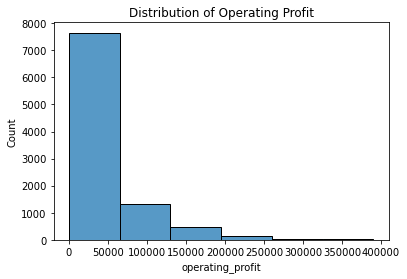

In [5]:
# visualization of operating profit distribution of operating profit
sns.histplot(df.operating_profit, bins = 6) .set(title = "Distribution of Operating Profit")


[Text(0.5, 1.0, 'Distribution of units_sold')]

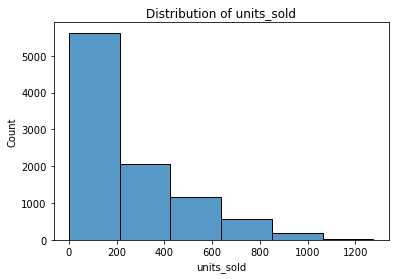

In [6]:
# visualization of operating profit distribution of operating profit
sns.histplot(df.units_sold, bins = 6) .set(title = "Distribution of units_sold")


[Text(0.5, 1.0, 'Distribution of Total Sales')]

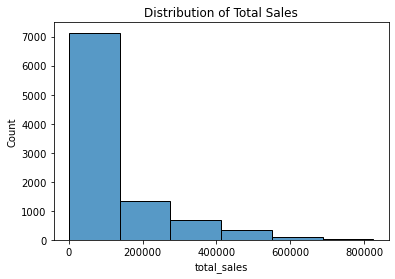

In [7]:
# visualization of operating profit distribution of operating profit
sns.histplot(df.total_sales, bins = 6) .set(title = "Distribution of Total Sales")


## Takeaway 
- most retailer profits are less than $100,000

In [8]:
# checking to see that invoice is date tieme variable now 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   retailer          9648 non-null   object        
 1   invoice_date      9648 non-null   datetime64[ns]
 2   region            9648 non-null   object        
 3   state             9648 non-null   object        
 4   city              9648 non-null   object        
 5   product           9648 non-null   object        
 6   price_per_unit    9648 non-null   float64       
 7   units_sold        9648 non-null   int64         
 8   total_sales       9648 non-null   float64       
 9   operating_profit  9648 non-null   float64       
 10  operating_margin  9648 non-null   float64       
 11  sales_method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 904.6+ KB


In [9]:
# set index to date time variable 
df.set_index('invoice_date', inplace=True)
df

,retailer,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method
invoice_date,,,,,,,,,,,
2020-01-01,Foot Locker,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
2020-01-02,Foot Locker,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2020-01-03,Foot Locker,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
2020-01-04,Foot Locker,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
2020-01-05,Foot Locker,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-24,Foot Locker,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
2021-01-24,Foot Locker,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
2021-02-22,Foot Locker,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet


In [10]:
#add month and day of week column to dataframe 
df['month']=df.index.strftime('%B')
df['day_of_week']= df.index.strftime('%A')
df['year']= df.index.strftime('%Y')
df

,retailer,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method,month,day_of_week,year
invoice_date,,,,,,,,,,,,,,
2020-01-01,Foot Locker,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store,January,Wednesday,2020
2020-01-02,Foot Locker,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store,January,Thursday,2020
2020-01-03,Foot Locker,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store,January,Friday,2020
2020-01-04,Foot Locker,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store,January,Saturday,2020
2020-01-05,Foot Locker,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store,January,Sunday,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-24,Foot Locker,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet,January,Sunday,2021
2021-01-24,Foot Locker,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet,January,Sunday,2021
2021-02-22,Foot Locker,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet,February,Monday,2021


In [11]:
# what years are contained in this data 
df.year.unique()

array(['2020', '2021'], dtype=object)

In [12]:
# what months are included in this data 
df.month.unique()

array(['January', 'February', 'March', 'April', 'May', 'July', 'August',
       'September', 'October', 'November', 'December', 'June'],
      dtype=object)

In [13]:
# look at max and min date 

df.index.min(), df.index.max()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2021-12-31 00:00:00'))

### takeaways 
- data includes all months in both years 

<AxesSubplot:xlabel='invoice_date'>

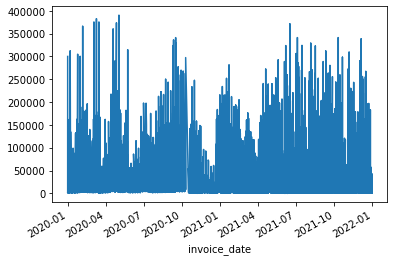

In [14]:
# visualizing target variable 
df.operating_profit.plot()

In [15]:
# visualize the minimum operating profit 
df.resample('M').operating_profit.min()

invoice_date
2020-01-31     998.20
2020-02-29    1587.60
2020-03-31     848.64
2020-04-30    1432.60
2020-05-31    1451.97
2020-06-30    1185.60
2020-07-31    1478.40
2020-08-31    1736.00
2020-09-30    2382.80
2020-10-31     253.80
2020-11-30     112.00
2020-12-31     309.12
2021-01-31     255.75
2021-02-28     144.00
2021-03-31      75.20
2021-04-30     135.30
2021-05-31     203.00
2021-06-30       0.00
2021-07-31     107.59
2021-08-31     503.44
2021-09-30     308.70
2021-10-31     166.40
2021-11-30     112.64
2021-12-31     425.70
Freq: M, Name: operating_profit, dtype: float64

<AxesSubplot:xlabel='invoice_date'>

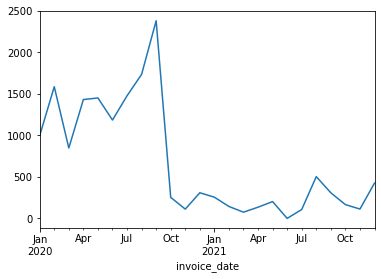

In [16]:
# visualize the minimum operating profit 
df.resample('M').operating_profit.min().plot()

In [17]:
# visualize the max operating profit 
df.resample('M').operating_profit.max()

invoice_date
2020-01-31    312500.0
2020-02-29    366000.0
2020-03-31    382500.0
2020-04-30    373750.0
2020-05-31    390000.0
2020-06-30    168750.0
2020-07-31    198000.0
2020-08-31    250000.0
2020-09-30    341250.0
2020-10-31    297500.0
2020-11-30    158125.0
2020-12-31    216000.0
2021-01-31    281250.0
2021-02-28    204750.0
2021-03-31    176175.0
2021-04-30    272250.0
2021-05-31    292500.0
2021-06-30    371250.0
2021-07-31    341250.0
2021-08-31    329062.5
2021-09-30    312000.0
2021-10-31    341250.0
2021-11-30    309375.0
2021-12-31    338625.0
Freq: M, Name: operating_profit, dtype: float64

<AxesSubplot:xlabel='invoice_date'>

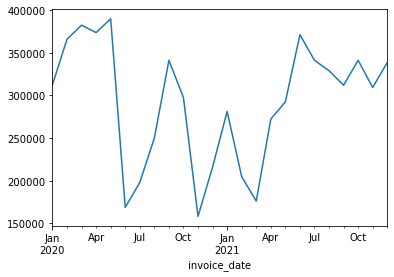

In [18]:
# visualize the max operating profit 
df.resample('M').operating_profit.max().plot()

In [19]:
# what is the mean operating profit
df.resample('M').operating_profit.mean()

invoice_date
2020-01-31    38866.702733
2020-02-29    45678.547719
2020-03-31    44748.139389
2020-04-30    71548.410308
2020-05-31    61798.336316
2020-06-30    38212.123500
2020-07-31    47285.241442
2020-08-31    52798.018273
2020-09-30    74163.567083
2020-10-31    48133.362907
2020-11-30    26509.297524
2020-12-31    29480.393804
2021-01-31    27161.644304
2021-02-28    24449.217915
2021-03-31    21725.457139
2021-04-30    25679.246090
2021-05-31    33207.466731
2021-06-30    36505.214514
2021-07-31    43488.408179
2021-08-31    37972.711148
2021-09-30    32815.775124
2021-10-31    28762.328832
2021-11-30    31843.543754
2021-12-31    43295.361019
Freq: M, Name: operating_profit, dtype: float64

<AxesSubplot:xlabel='invoice_date'>

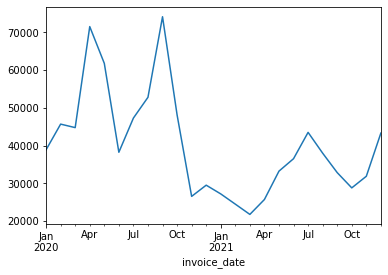

In [20]:
# resample by month and plot average operating operating profit 
df.resample('M').operating_profit.mean().plot()

In [21]:
# date of min profit 
df.resample('M').operating_profit.mean().idxmin()

Timestamp('2021-03-31 00:00:00', freq='M')

In [22]:
# month and year with max operating profit 
df.resample('M').operating_profit.mean().idxmax()

Timestamp('2020-09-30 00:00:00', freq='M')

In [23]:
# calculate range of operating profit by month
minmax_df = df.resample('M').operating_profit.agg(['min','max'])

In [24]:
# range of operating margin for each month 
minmax_df['change'] = minmax_df['max'] -minmax_df['min']
minmax_df

,min,max,change
invoice_date,,,
2020-01-31,998.20,312500.0,311501.80
2020-02-29,1587.60,366000.0,364412.40
2020-03-31,848.64,382500.0,381651.36
2020-04-30,1432.60,373750.0,372317.40
2020-05-31,1451.97,390000.0,388548.03
2020-06-30,1185.60,168750.0,167564.40
2020-07-31,1478.40,198000.0,196521.60
2020-08-31,1736.00,250000.0,248264.00
2020-09-30,2382.80,341250.0,338867.20


## Questions for Project 


### Which month and year has the largest range? 

<AxesSubplot:xlabel='invoice_date'>

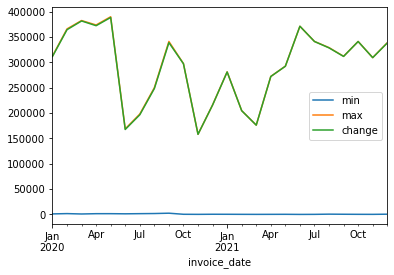

In [28]:
# visualization of range of operating profit each month 
minmax_df.plot()

In [27]:
# month and year with lowest operating profit range
minmax_df.change.idxmin()

Timestamp('2020-11-30 00:00:00', freq='M')

In [38]:
# month and year with highest operating profit range
minmax_df.change.idxmax()

Timestamp('2020-05-31 00:00:00', freq='M')

### Which month and year has the highest average operating profit? 


<AxesSubplot:xlabel='invoice_date'>

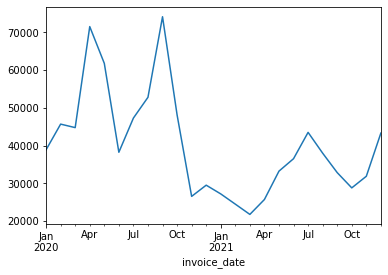

In [39]:
# visualization of month and year average operating profit 
df.resample('M').operating_profit.mean().plot()

In [40]:
# month and year with max operating profit 
df.resample('M').operating_profit.mean().idxmax()

Timestamp('2020-09-30 00:00:00', freq='M')

### Which month and year  has the lowest average operating profit?

<AxesSubplot:xlabel='invoice_date'>

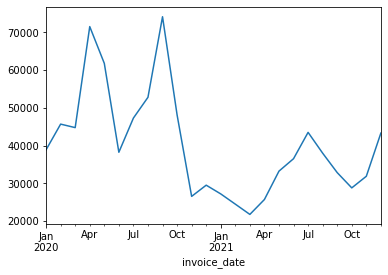

In [41]:
# visualization of month and year average operating profit 
df.resample('M').operating_profit.mean().plot()

In [42]:
# month and year with lowest operating profit 
df.resample('M').operating_profit.mean().idxmin()

Timestamp('2021-03-31 00:00:00', freq='M')

### Which month and year has the highest overall operating profit?


<AxesSubplot:xlabel='invoice_date'>

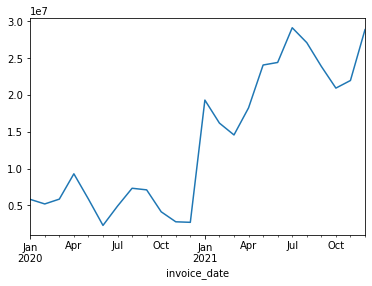

In [31]:
# visualize total operating profit in each month 
df.resample('M').operating_profit.sum().plot()

In [46]:
# month and year with the highest total operating profit
df.resample('M').operating_profit.sum().idxmax()

Timestamp('2021-07-31 00:00:00', freq='M')

### Which month and year has the lowest overall operating profit?


<AxesSubplot:xlabel='invoice_date'>

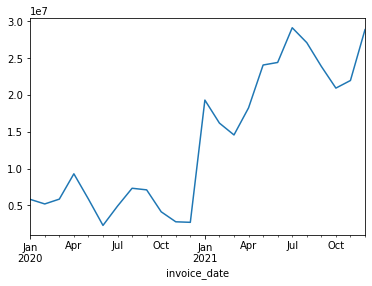

In [44]:
# visualize total operating profit in each month 
df.resample('M').operating_profit.sum().plot()

In [45]:
# month and year with the lowest total operating profit
df.resample('M').operating_profit.sum().idxmin()

Timestamp('2020-06-30 00:00:00', freq='M')

## Which month has the lowest overall operating profit?

In [52]:
# list of months and their overall operating profit
df.groupby('month').operating_profit.sum()

month
April        27559237.31
August       34451440.30
December     31590202.03
February     21392736.70
January      25141934.51
July         34054898.59
June         26714715.92
March        20439788.00
May          29946255.33
November     24755521.43
October      25078444.60
September    31009586.73
Name: operating_profit, dtype: float64

<AxesSubplot:xlabel='month'>

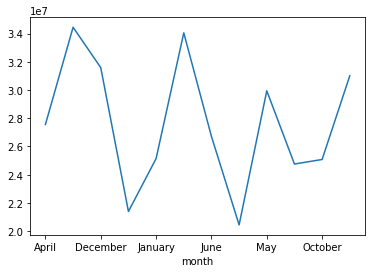

In [53]:
# visualization of overall profit by month 
df.groupby('month').operating_profit.sum().plot()

In [55]:
# month with lowest overall profit by month 
df.groupby('month').operating_profit.sum().idxmin()

'March'

In [57]:
# lowest overall operating profit value 
df.groupby('month').operating_profit.sum().min()

20439788.0

## Which month has the highest overall operating profit? 

In [56]:
# month with highest overall profit by month 
df.groupby('month').operating_profit.sum().idxmax()

'August'

In [59]:
# highest overall operating profit value 
df.groupby('month').operating_profit.sum().max()

34451440.300000004

## Modeling 

### What is next years projection for the max operating profit?  

# Conclusion


## Next Steps 
- Which region has the highest operating profit?
- Which region has the min opearting profit? 

